#  School Shootings

This notebook seeks to comprehensively explore and identify key strategies for limiting school shootings. Specifically, this notebook explores the relationship between gun regulations, gun ownership, and the frequency of school shootings. The goal is to provide insights and recommendations for policymakers, educators, and communities to create safer environments within schools.

### In the cell below, libraries are imported

In [854]:
# Pandas is a library in the Python programming language for data manipulation and analysis.
import pandas as pd

# Matplotlib is a plotting library for the Python programming language
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# The sklearn library contains a lot of efficient tools for machine learning, including classification, regression, clustering and dimensionality reduction.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Numpy is a library that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# SciPy is an open-source Python library which is used to solve scientific and mathematical problems.
from scipy import stats

# Plotly is an open-source module of Python that is used for data visualization.
import plotly.graph_objects as go

### Loading the data

In [856]:
# This line reads Data-Table 1.csv into a dataset.
# This dataset contains information about school shootings per year.
year_df = pd.read_csv('Data-Table 1.csv')

# This line reads incident_table.csv into a dataset.
# This dataset contains information about school shooting incidents.
incident_df = pd.read_csv('incident_table.csv')

# This line reads raw_data.csv into a dataset.
# This dataset contains information about gun regulations per state.
regulation_df = pd.read_csv('raw_data.csv')

# This line reads state_population_2000-2009.csv into a dataset.
# This dataset contains information about state populations.
population_df = pd.read_csv('state_population_2000-2009.csv')

# This line reads state_gunownership.csv into a dataset. 
# This dataset contains information about every state's gun ownership rate.
ownership_df = pd.read_csv('state_gunownership.csv')

# This line reads school-shootings-data.csv into a dataset.
# This dataset contains information about school shooting incidents. 
school_shootings_df = pd.read_csv('school-shootings-data.csv')

### Why I narrowed my analysis around gun regulations

The bar graph below is a visualization from a previous notebook, where I analysed the entirety of data around school shootings. Out of curiosity I decided to dive in deeper to the potential relationship between gun regulations and school shootings. 

Here is what I said in a previous presentation during the early stages of this research project: "According to my first data set, North Carolina, a state with the [9th highest population](https://wisevoter.com/state-rankings/states-by-population/), has the 4th most school shootings since 1999; when compared to New York, a state with the 4th highest population, has the 13th most school shootings since 1999. North Carolina open carrying is legal without a permit, whereas in New York, you need a license to open carry. It seems that there is a relationship between open carrying laws and school shootings. In the future I will explore this relationship more with additional datasets."

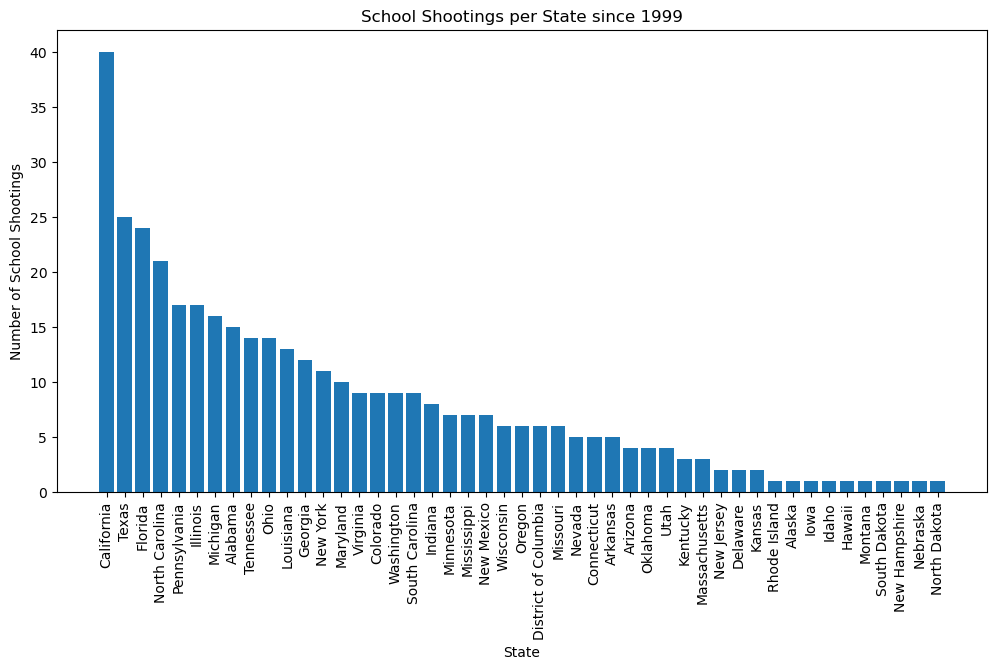

In [859]:
# This line calculates the number of occurrences of each unique value in the 'State' column.
school_shootings_per_state = school_shootings_df['state'].value_counts()

# This line sets the bar graph to have wider labels.
plt.figure(figsize=(12, 6))
plt.bar(school_shootings_per_state.index, school_shootings_per_state.values)

# This line adds labels and a title.
plt.xlabel('State')
plt.ylabel('Number of School Shootings')
plt.title('School Shootings per State since 1999')

# This line rotates the x-axis labels for better readability.
plt.xticks(rotation=90)

# Displaying the graph
plt.show()

# Data acquisition

incident_df is acquired from [K-12 School Shooting Database](https://k12ssdb.org/). <br />
regulation_df is acquired from [Jacob Boysen](https://www.kaggle.com/datasets/jboysen/state-firearms/). <br />
population_df is acquired from [US Census](https://www2.census.gov/programs-surveys/popest/tables/2000-2009/state/totals/). <br />
ownership_df is acquired from [World Population Review](https://worldpopulationreview.com/state-rankings/gun-ownership-by-state).<br />
year_df is acquired from [Statista](https://www.statista.com/statistics/971473/number-k-12-school-shootings-us/). <br />
school_shootings_df is acquired from [Joakim Arvidsson](https://www.kaggle.com/datasets/joebeachcapital/school-shootings).

# Preparing the data

#### Preparing the year data set 

The year_df will be used to run regressions and create visualizations about school shootings per year.

In [865]:
# This line drops the first column, since it is blank.
year_df = year_df.drop(year_df.columns[0], axis=1)

# This line drops the fourth column, since it is blank.
year_df.drop('Unnamed: 4', axis=1, inplace=True)

# This line drops the first three rows of the data set.
year_df = year_df.drop([0, 1, 2, 3])

# These lines rename the column names. 
year_df = year_df.rename(columns={year_df.columns[0]: 'year'})
year_df = year_df.rename(columns={year_df.columns[1]: 'Not active shooter'})
year_df = year_df.rename(columns={year_df.columns[2]: 'Active shooter'})

# This line changes '2022*' into 2022
year_df.loc[year_df['year'] == '2022*', 'year'] = 2022

# These lines change all of the values in the dataset into integers. 
year_df['Not active shooter'] = year_df['Not active shooter'].astype(int)
year_df['Active shooter'] = year_df['Active shooter'].astype(int)
year_df['year'] = year_df['year'].astype(int)

# This lines combines both the active and nonactive shooters into one column
year_df['shootings'] = year_df['Not active shooter'] + year_df['Active shooter']

# This line only keeps rows that contain the year 1991 or higher. 
year_df = year_df[year_df['year'].astype(int) >= 1991]

#### Preparing the shootings per state data set

In [867]:
# This line of code keeps rows in incident_df with a year that is either 1991 or above.
# This is done in order to show a better correlation in between my visualizations.
# When all years from 1966 to 2023 are included, my correlations are less visible.
# This is because school shootings began to increase at a higher rate towards the 90s.
# Another reason why only the years 1991 and above were kept is because the regulation_df is only available after 1991.
incident_df = incident_df[incident_df['Year'].astype(int) >= 1991]

In [868]:
# This line counts the number of shootings per state.
shootings_per_state = incident_df['State'].value_counts()

# This line stores the values of shoorings_per_state into a dataset.
shootings_per_state_df = shootings_per_state.to_frame().reset_index()

# This line displays the newly created dataset.
shootings_per_state_df

,State,count
0,CA,211
1,TX,152
2,FL,114
3,IL,108
4,PA,97
5,OH,95
6,GA,89
7,NY,85
8,MI,82
9,NC,80


In [869]:
# As seen above, there are two 'State' values that are not actually states.
# These two lines of code below remove the Virgin Islands and the District of Columbia from the dataset.
states_to_remove = ["VI", "DC"]
shootings_per_state_df = shootings_per_state_df[~shootings_per_state_df['State'].isin(states_to_remove)]
# These two values are removed because later datasets only have rows with States. 

In [870]:
# The lines below will reset the row indexes. This is important for merging, which is done later on in this notebook.
shootings_per_state_df = shootings_per_state_df.reset_index(drop=True)

# This line changes the name of the 'State' column into 'state', which will allow for easier merging later on.
shootings_per_state_df.rename(columns={'State': 'state'}, inplace=True)

# This line displays the dataset to check if the two values have been removed and if the indexes have been reset.
shootings_per_state_df

,state,count
0,CA,211
1,TX,152
2,FL,114
3,IL,108
4,PA,97
5,OH,95
6,GA,89
7,NY,85
8,MI,82
9,NC,80


#### Preparing the population data set

In [872]:
# This line defines which column to keep.
columns_to_keep = ["NAME", "POPESTIMATE2007"]

# This line deletes all other columns in population_df.
population_df = population_df[columns_to_keep]

# The reason only the 2007 population is kept is because it is the median and mean year between 1991 and 2023.
# The 2007 population is very close to the mean population of all years because since 1991 and 2023, the population grew linearly.
# Getting the mean population of all years was difficult because no datasets about earlier years were easily accesible.

In [873]:
# This line renames the 'NAME' column to 'state which allows for easier merging later on.
population_df.rename(columns={'NAME': 'state'}, inplace=True)

# This line assigns states state abbreviations. 
state_initials = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# This line replaces all state names with the state's abbreviation. This done in order for future visualizations and for future merging.
population_df['state'] = population_df['state'].replace(state_initials)

In [874]:
# These lines remove the District of Columbia from the population_df. 
remove_dc = ["District of Columbia"]
population_df = population_df[~population_df['state'].isin(remove_dc)]

# This line resets the index of population_df for future merging.
population_df = population_df.reset_index(drop=True)

In [875]:
# This line displays population_df in order to check if the dataset is set up correctly.
population_df

,state,POPESTIMATE2007
0,AL,4637904
1,AK,682297
2,AZ,6362241
3,AR,2842194
4,CA,36226122
5,CO,4842259
6,CT,3488633
7,DE,864896
8,FL,18277888
9,GA,9533761


#### Preparing the regulation data set

In [877]:
# This line replaces all state names with state abbreviations. This done in order for future visualizations and merging.
regulation_df['state'] = regulation_df['state'].replace(state_initials)

In [878]:
# This line gets the average gun regulations per state between the years 1991 and 2017.
average_lawtotal_by_state = regulation_df.groupby('state')['lawtotal'].mean()
# This average is taken in order to give an accurate representation of gun regulation totals per state. 

# This line resets the indexes of the rows of the dataset
regulations_per_state_df = average_lawtotal_by_state.to_frame().reset_index()

#This line displays the dataset in order to see if there are any errors.
regulations_per_state_df

,state,lawtotal
0,AK,6.296296
1,AL,12.407407
2,AR,12.481481
3,AZ,12.037037
4,CA,85.111111
5,CO,16.888889
6,CT,65.481481
7,DE,25.370370
8,FL,20.888889
9,GA,10.629630


#### Preparing the ownership data set

In [880]:
# This line renames the 'NAME' column to 'state which allows for easier merging later on.
ownership_df.rename(columns={'NAME': 'state'}, inplace=True)

# This line replaces all state names with state abbreviations. This is done for future merging.
ownership_df['state'] = ownership_df['state'].replace(state_initials)

In [881]:
# This line displays the dataset to check for potential errors.
ownership_df

,state,GunOwnership2022
0,AL,55.5
1,AK,64.5
2,AZ,46.3
3,AR,57.2
4,CA,28.3
5,CO,45.1
6,CT,23.6
7,DE,34.4
8,FL,35.3
9,GA,49.2


In [882]:
# These four lines sort the values of all the datasets, needed for merging, into alphabetical order.
ownership_df = ownership_df.sort_values('state')
population_df = population_df.sort_values('state')
regulations_per_state_df = regulations_per_state_df.sort_values('state')
shootings_per_state_df = shootings_per_state_df.sort_values('state')

#### Merging the data sets together

In [884]:
# This line merges the shootings, population, ownership, and regulations data sets together. 
# A merged dataset allows for comprehensive analysis, correlation identification, and cross-validation.
merged_df = shootings_per_state_df.merge(ownership_df, on='state').merge(population_df, on='state').merge(regulations_per_state_df, on='state')

In [885]:
# This line creates a new column in the merged data set called 'Shootings_per_Population'. 
# This new column is the result of dividing the count of school shootings in a state by the population of the state. 
# The population is divided by 1000000, which helps scale the 'Shootings_per_Population' values down to a more managable scale.
merged_df['Shootings_per_Population'] = merged_df['count'] / (merged_df['POPESTIMATE2007'] / 1000000)

In [886]:
# This line displays the merged dataset in order to check for errors.
merged_df

,state,count,GunOwnership2022,POPESTIMATE2007,lawtotal,Shootings_per_Population
0,AK,7,64.5,682297,6.296296,10.259462
1,AL,53,55.5,4637904,12.407407,11.427576
2,AR,28,57.2,2842194,12.481481,9.851544
3,AZ,23,46.3,6362241,12.037037,3.615078
4,CA,211,28.3,36226122,85.111111,5.824526
5,CO,35,45.1,4842259,16.888889,7.228031
6,CT,18,23.6,3488633,65.481481,5.159614
7,DE,14,34.4,864896,25.370370,16.186917
8,FL,114,35.3,18277888,20.888889,6.237044
9,GA,89,49.2,9533761,10.629630,9.335246


# Analyzing the data

### Gun Regulations

In [889]:
# The lines below create a scatter plot of the relationship between the average gun regulations vs school shootings per 1,000,000 State citizens.

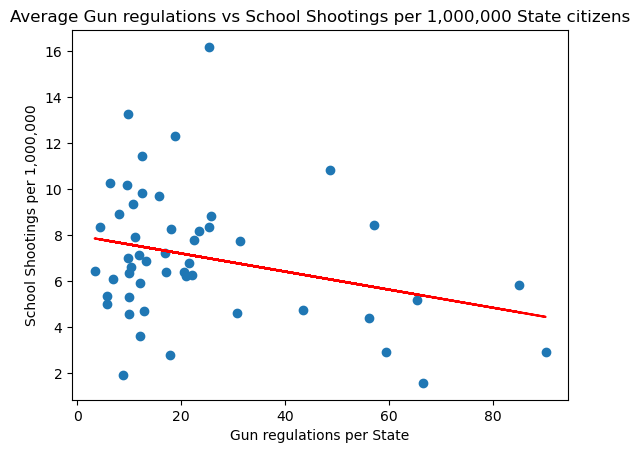

In [890]:
x = merged_df['lawtotal']
y = merged_df['Shootings_per_Population']

# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.xlabel('Gun regulations per State')
plt.ylabel('School Shootings per 1,000,000')
plt.title('Average Gun regulations vs School Shootings per 1,000,000 State citizens')
plt.show()

In [891]:
# This visualization makes it evident that when a State has a high concentration of gun regulations, the average number of shootings per a state's population decreases.

In [892]:
# This line generates a p_value 
# The p-value is a crucial metric in statistical hypothesis and helps assess the strength of evidence against the null hypothesis.
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("p-value:", p_value)

p-value: 0.044645728756822836


p_value information [wikipedia]('')

In [894]:
# A p-value below a predetermined significance level (commonly set at 0.05) is often considered evidence of statistical significance.
# As seen above, the correlation between school shootings and gun regulations is of statistical significance. 

In [895]:
# The lines below create a choropleth map of gun regulations per state from 1991-2017.

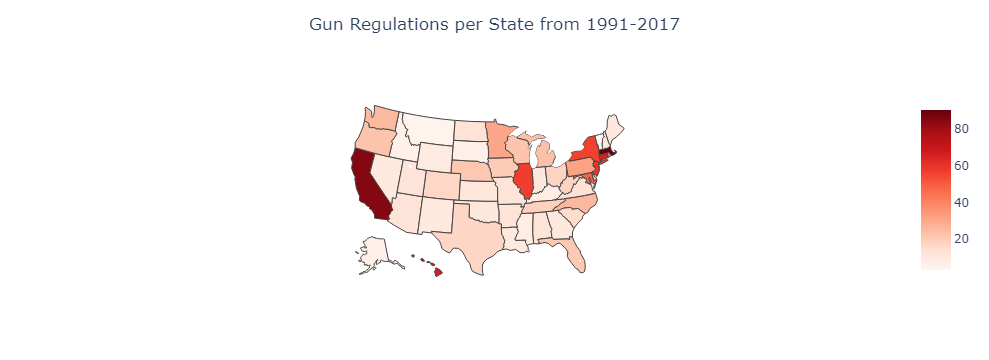

In [896]:
fig = go.Figure(data=go.Choropleth(
    locations = merged_df['state'],
    z = merged_df['lawtotal'].astype(float), # This line sets the data to be color-coded.
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    
))

fig.update_layout(
    title={
        'text': 'Gun Regulations per State from 1991-2017',
        'x': 0.5,  # This line sets the x position to center the title.
        'xanchor': 'center',  # This line anchors the title to the center.
        'y': 0.95  # This line sets the y position of the title.
    },
    geo_scope='usa' # This line limits the map scope to the USA.
)


fig.show()

In [897]:
# The lines below create a choropleth map of the school shootings per 1 million from 1991-2023.

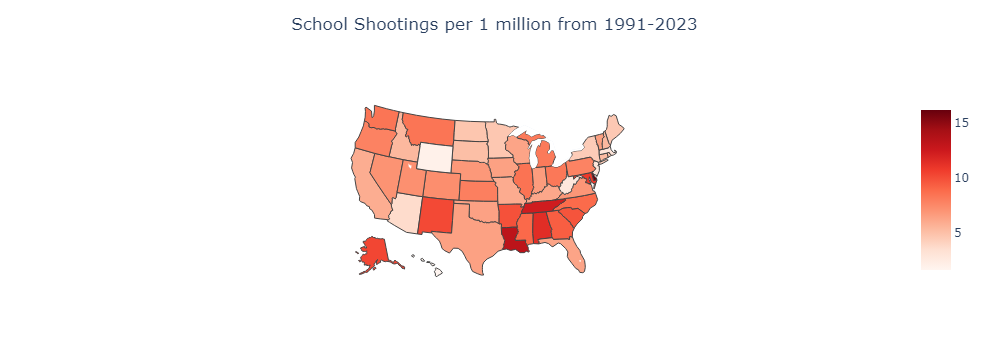

In [898]:
fig = go.Figure(data=go.Choropleth(
    locations=merged_df['state'], 
    z = merged_df['Shootings_per_Population'].astype(float), # This line sets the data to be color-coded
    locationmode = 'USA-states', 
    colorscale = 'Reds',
))

fig.update_layout(
    title={
        'text': 'School Shootings per 1 million from 1991-2023',
        'x': 0.5,  # This line sets the x position to center the title.
        'xanchor': 'center',  # This line anchors the title to the center.
        'y': 0.95  # This line sets the y position of the title.
    },
    geo_scope='usa', # This line limits the map scope to the USA.
)

fig.show()

As seen by the two heat maps above, there is a clear correlation between states with more gun laws and their low number of school shootings. 
For example California has a high concentration of regulations but a low concentration of shootings. 
Conversely, Louisiana has a low concentration of regulations but one of the highest concentrations of shootings.

### Gun ownership

In [901]:
# The two lines below assign the shootings and gun ownership of a state into an x and y variable. This is to done to set up a linear regression.

In [902]:
y = merged_df['Shootings_per_Population']
x = merged_df['GunOwnership2022']

In [903]:
# This line creates an instance of the LinearRegression class and assigns it to the variable regr. 
# This variable, regr, represents a linear regression model that can be trained on data and used to make predictions.
regr = linear_model.LinearRegression()

# This line converts x to a NumPy array and reshapes it.
x = np.array(x).reshape(-1, 1)

# This line fits the model to the data.
regr.fit(x, y)

LinearRegression()

In [904]:
# This line defines Y_predict. Y_predict is the variable that will store the predicted values for corresponding input features. 
# After executing this line, Y_predict will contain the model's predictions based on the provided input features.
Y_predict = regr.predict(x)

In [905]:
# This line defines the range of the gun ownership rate that the regression will predict.
X_predict_larger_values = np.array(range(66,100))

# This line reshapes the values between -1.1
X_predict_larger_values = X_predict_larger_values.reshape(-1,1)
future_predict = regr.predict(X_predict_larger_values)

# This line defines the range of the gun ownership rate that the regression will predict.
X_predict_smaller_values = np.array(range(0,14))

# This line reshapes the values between -1.1
X_predict_smaller_values = X_predict_smaller_values.reshape(-1,1)
past_predict = regr.predict(X_predict_smaller_values)

In [906]:
# The lines below create a linear regression of the relationship between gun ownership rate vs school shootings per 1,000,000 citizens per State.

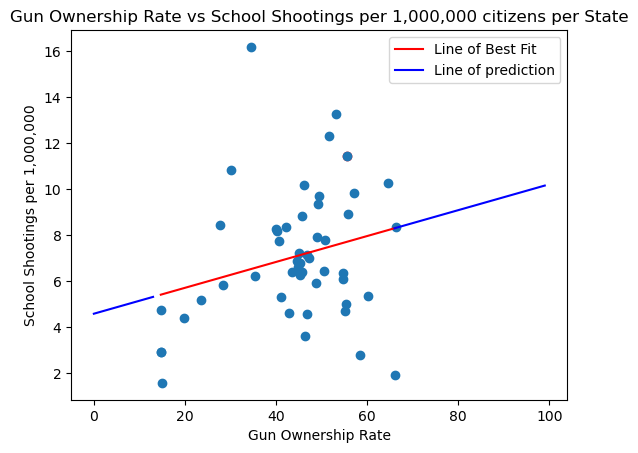

In [907]:
y = merged_df['Shootings_per_Population']
x = merged_df['GunOwnership2022']

# These lines help set up the line of best fit.
coefficients = np.polyfit(x, y, 1)
line_of_best_fit = np.poly1d(coefficients)

# This line generates x values for the line of best fit.
x_line = np.linspace(x.min(), x.max(), 100)

plt.scatter(x[1], y[1], color='red', marker='o')  

# These lines plot the scatter plot and line of best fit.
plt.scatter(x, y)
plt.plot(x_line, line_of_best_fit(x_line), color='red', label='Line of Best Fit')
plt.plot(X_predict_larger_values, future_predict,color='blue', label='Line of prediction')
plt.plot(X_predict_smaller_values, past_predict,color='blue')
plt.ylabel('School Shootings per 1,000,000')
plt.xlabel('Gun Ownership Rate')
plt.title('Gun Ownership Rate vs School Shootings per 1,000,000 citizens per State')

plt.legend()
plt.show()

As illustrated by the figure above, a state’s gun ownership rate has a clear connection to the amount of shootings that occur. If we as a nation can reduce our gun ownership rate, then we can control the number of school shootings that occur. However, if gun ownership is increased, the critical problem of school shootings will be even more exaggerated.

In [909]:
# The lines below create a scatter plot with a line of best fit of a state's gun regulations and gun ownership rate.

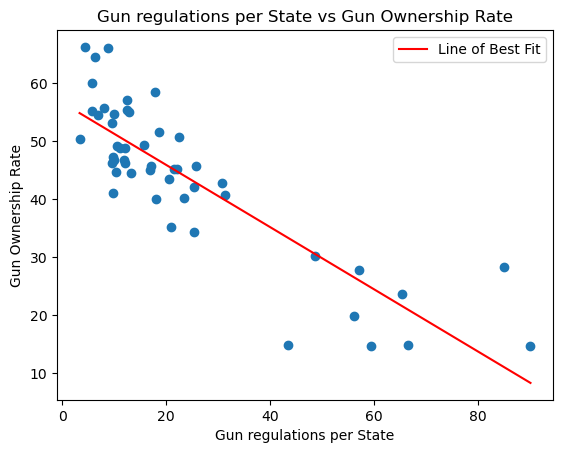

In [910]:
y = merged_df['GunOwnership2022']
x = merged_df['lawtotal']

# This line sets up the line of best fit.
coefficients = np.polyfit(x, y, 1)
line_of_best_fit = np.poly1d(coefficients)

# This line generates x values for the line of best fit.
x_line = np.linspace(x.min(), x.max(), 100)



# This line plots the scatter plot and line of best fit. 
plt.scatter(x, y)
plt.plot(x_line, line_of_best_fit(x_line), color='red', label='Line of Best Fit')
plt.ylabel('Gun Ownership Rate')
plt.xlabel('Gun regulations per State')
plt.title('Gun regulations per State vs Gun Ownership Rate')

plt.legend()
plt.show()

The scatter plot above illustrates an inverse correlation: as the stringency of gun regulations increases within a state, the corresponding gun ownership rate tends to decrease. 

### General analysis of school shootings

In [913]:
# These following lines print the number of victims of school shootings since 1991. 

In [914]:
total_victims = incident_df["Number_Victims"].sum()
total_victims

2190

In [915]:
# These following lines print the number of victims of school shootings from 1991-2017

In [916]:
incident_df = incident_df[(incident_df['Year'] >= 1991) & (incident_df['Year'] <= 2017)]
total_victims = incident_df["Number_Victims"].sum()
total_victims

1160

During the previous peer presentation, I unintentianally gave the wrong data by stating that there have been 1160 school shootings since 1966. When I ran the code for total_victims, I forgot that I had put a range on the incident_df. I went back and updated my infographic with the accurate data, which is that there have been 2190 school shooting victims since 1991.

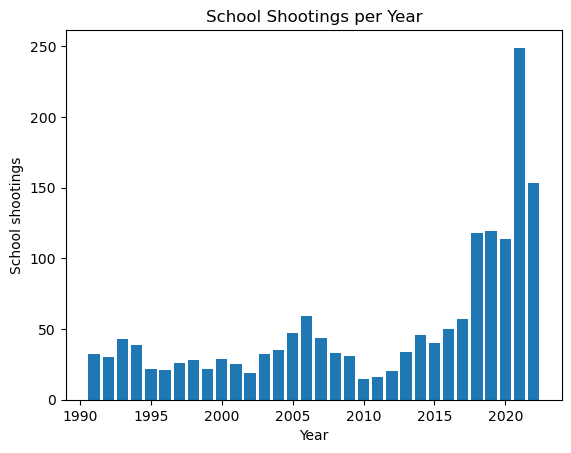

In [918]:
# This line creates a bar graph of the incidents per year
plt.bar(year_df['year'], year_df['shootings'])

# This line sets the title and labels for the graph
plt.title('School Shootings per Year')
plt.xlabel('Year')
plt.ylabel('School shootings')

plt.show()

In [919]:
# The two lines below assign the year and shootings of a the year into an X and Y variable. This is to done to set up a linear regression.
X = year_df['year']

# This line reshapes the x values into -1 to 1
X = X.values.reshape(-1,1)

Y = year_df['shootings']

In [920]:
# This line creates an instance of the LinearRegression class and assigns it to the variable regr. 
# This variable, regr, represents a linear regression model that can be trained on data and used to make predictions.
regr = linear_model.LinearRegression()

# This line fits the model to the data.
regr.fit(X,Y)

LinearRegression()

In [921]:
# This line defines Y_predict. Y_predict is the variable that will store the predicted values for corresponding input features. 
# After executing this line, Y_predict will contain the model's predictions based on the provided input features.
Y_predict = regr.predict(X)

In [922]:
# This line sets the range of how far into the future the linear regression will predict.
X_future = np.array(range(2022,2035))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future)

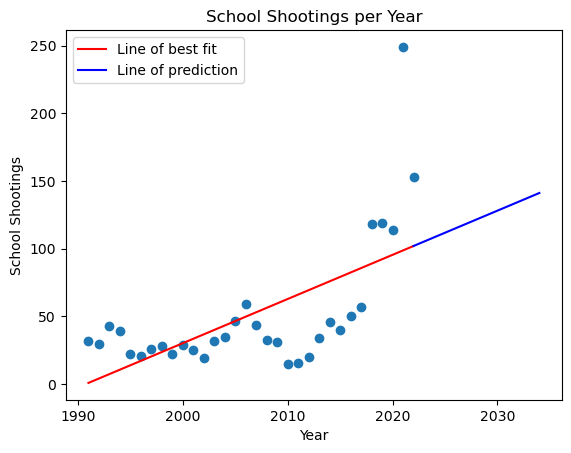

In [923]:
# These lines set the title and lable of the visualization
plt.ylabel('School Shootings')
plt.xlabel('Year')
plt.title('School Shootings per Year') 

# These lines plot the visualization.
plt.scatter(X,Y)
plt.plot(X,Y_predict, color='red', label = 'Line of best fit')
plt.plot(X_future, future_predict, color='blue', label='Line of prediction')
plt.legend()
plt.show()

As seen in the graph above, there is a clear and concerning trend: School Shootings per year have been increasing since the 90s and will continue to increase for the foreseeable future if no action is taken.
